In [1]:
import pandas as pd
import re

In [18]:
data_frames2013 = {}

# 1부터 30까지 반복
for i in range(1, 31):
    # CSV 파일 읽기
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2013/TV_RAINGAUGEINFO_2013_{i}.csv"
    data_frames2013[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')

# 이제 데이터프레임은 data_frames 딕셔너리에 저장됩니다.


In [39]:
df_list = [f'df_{i}' for i in range(1, 31)]

In [49]:
max_rainfall_per_day= {}


In [67]:
daily_rain = {}

In [73]:
def year_data(list):
    for i in df_list:
        data_frames2013[i]['RECEIVE_TIME'] = pd.to_datetime(data_frames2013[i]['RECEIVE_TIME'])
        data_frames2013[i]['DAY'] = data_frames2013[i]['RECEIVE_TIME'].dt.date
        max_rainfall_per_day[i]  = pd.Series(data_frames2013[i].groupby('DAY')['RAINFALLACCU'].max())
        daily_rain[i] = max_rainfall_per_day[i].diff()
        data = pd.concat(daily_rain[i] for i in df_list)
    return data

In [80]:
data = year_data(df_list)
data[0]

nan

In [84]:
for i in range(len(data)):
    if data[i]<=0:
        data[i] = 0
    else:
        continue

In [108]:
data

DAY
2013-01-01    NaN
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
             ... 
2013-12-27    0.0
2013-12-28    0.0
2013-12-29    0.0
2013-12-30    0.0
2013-12-31    0.0
Name: RAINFALLACCU, Length: 512, dtype: float64

In [107]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import pandas as pd
from matplotlib import pyplot as plt

In [117]:
df2013= pd.DataFrame(data)

In [119]:
df2013 = df2013.reset_index()

In [122]:
df2013 = df2013.fillna(0)

In [127]:
df2013.rename(columns={"DAY" : 'ds', 'RAINFALLACCU': 'y'}, inplace=True)

C:\Users\yis82\AppData\Local\Temp\ipykernel_26928\3665651621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2013.rename(columns={"DAY" : 'ds', 'RAINFALLACCU': 'y'}, inplace=True)


In [128]:
df2013

,ds,y
1,2013-01-02,0.0
2,2013-01-03,0.0
3,2013-01-04,0.0
4,2013-01-05,0.0
5,2013-01-06,0.0
...,...,...
507,2013-12-27,0.0
508,2013-12-28,0.0
509,2013-12-29,0.0
510,2013-12-30,0.0


In [129]:
m = Prophet()
m.fit(df2013)

17:56:18 - cmdstanpy - INFO - Chain [1] start processing
17:56:18 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,-20.425064,-475.267875,672.249491,-20.425064,-20.425064,119.965515,119.965515,119.965515,119.965515,119.965515,119.965515,0.0,0.0,0.0,99.540450
1,2013-01-03,-20.096424,-573.408350,571.586641,-20.096424,-20.096424,-12.740364,-12.740364,-12.740364,-12.740364,-12.740364,-12.740364,0.0,0.0,0.0,-32.836789
2,2013-01-04,-19.767784,-598.928296,480.565069,-19.767784,-19.767784,-19.642011,-19.642011,-19.642011,-19.642011,-19.642011,-19.642011,0.0,0.0,0.0,-39.409795
3,2013-01-05,-19.439144,-631.710249,498.594889,-19.439144,-19.439144,-24.971302,-24.971302,-24.971302,-24.971302,-24.971302,-24.971302,0.0,0.0,0.0,-44.410445
4,2013-01-06,-19.110503,-611.184507,475.681460,-19.110503,-19.110503,-15.628185,-15.628185,-15.628185,-15.628185,-15.628185,-15.628185,0.0,0.0,0.0,-34.738688


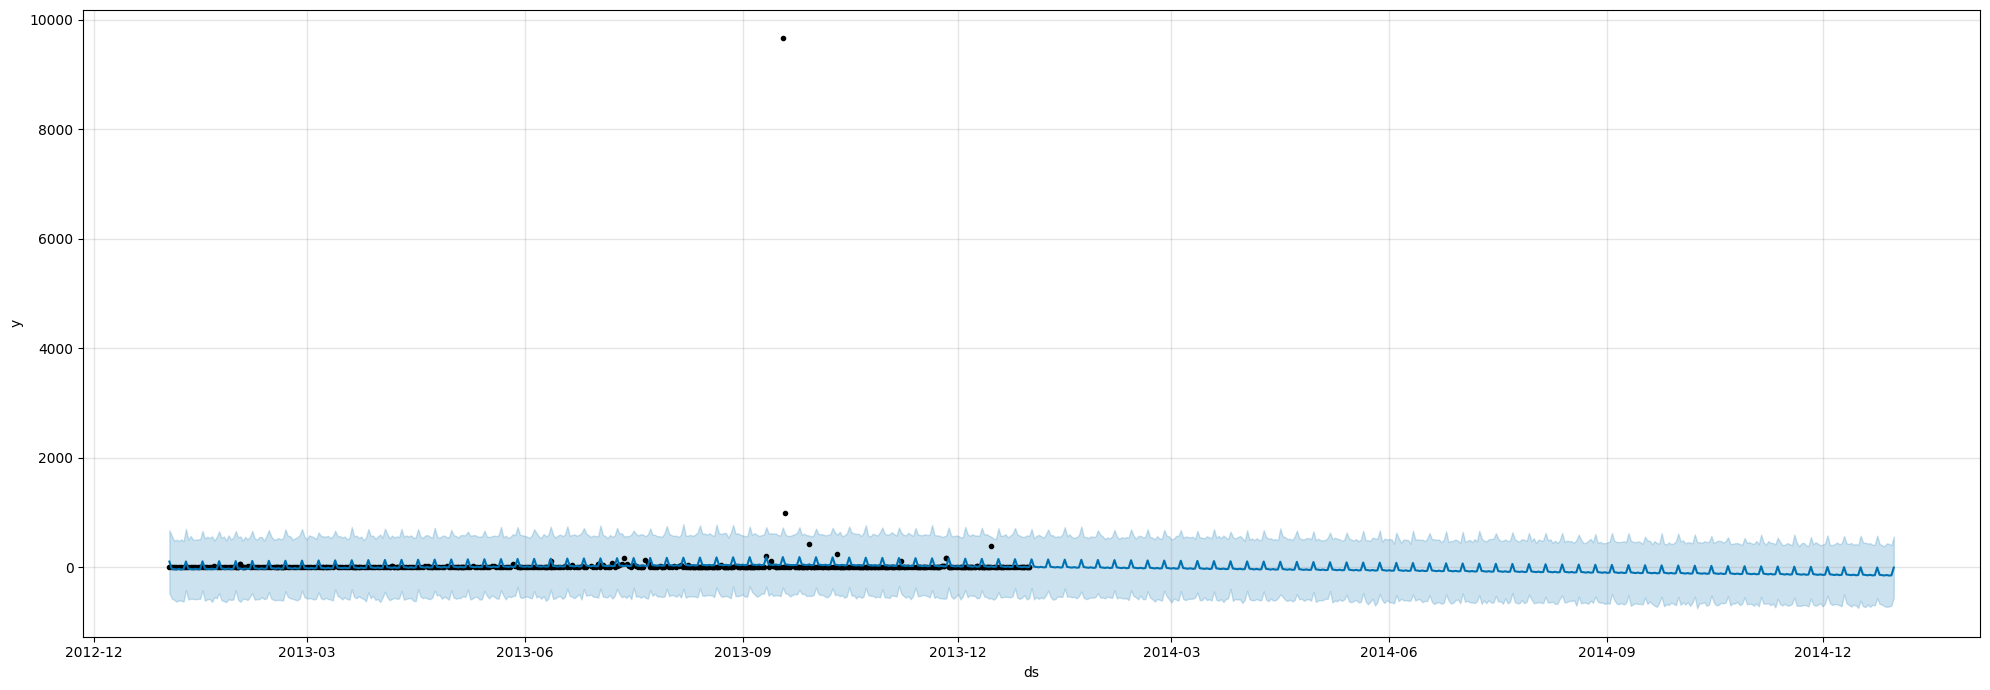

In [131]:
fig = m.plot(forecast,figsize=(20,7))